# Exercise #1

Airbnb has become an extremely popular platform for connecting travelers with housing rentals across the world. Its users can search its extensive database of rentals, in the hopes of finding a suitable match for their travels. Let's explore a data set of Airbnb rentals in Asheville, North CarolinaPreview the document, the destination of Prof. Barnes's recent Spring Break getaway. The data was collected on February 17, 2019 (courtesy of Inside Airbnb) and contains the following relevant information about the rentals:

- Unique identifiers for the rental (id) and the host (host_id)
- Name for the rental (name) and host (host_name)
- Location information (neighborhood - ZIP code, latitude/longitude)
- Room type
- Average nightly price (in dollars)
- Minimum nights per stay
- Number of reviews for the rental
- Date of most recent review
- Number of reviews per month
- Number of listings by the host in the last month
- Number of available days for rental over the next year (availability_365)
- Complete the following exercises using the provided data:

a.Perform an analysis of missingness in the data (i.e., what is the extent of missing values in the data and where do they occur?). Based on what you observe, perform an appropriate set of processing operations (if applicable) to manage the data appropriately. Please make sure to justify any processing steps (or lack of steps) that you perform.


In [1]:
import pandas as pd
df=pd.read_csv('airbnb_asheville_listings.csv',index_col='id')

In [2]:
#check the number of null values of each column
print(len(df))
df.isnull().sum()

2053


name                                 0
host_id                              0
host_name                            0
neighbourhood_group               2053
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        199
reviews_per_month                  199
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [3]:
#since the entire column of 'neighbourhood_group' is null, I just delete this column
del df['neighbourhood_group']

## I found that the rows having missing values for last_review and reviews_per_month are the same rows with number_of_reviews equal to 0, which means they don;t have reviews hence they  don't have values for last review and reviews per month.  

In [4]:
df[df['last_review'].isnull()==True]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
1138179,West Asheville,6243494,Mark,28806,35.58627,-82.60428,Private room,60,39,0,NaN,NaN,1,365
4510499,Lovely 3 bdrm 2 bath Kenilworth,14079532,Jenny,28803,35.57564,-82.54149,Entire home/apt,150,1,0,NaN,NaN,1,0
6544722,Sunny Spacious 2 Bedroom 1 Mi town,20446462,Cassie,28803,35.57742,-82.54288,Entire home/apt,110,13,0,NaN,NaN,1,0
6609327,The Barn At Mountain Meadows,26946813,Anna,28804,35.63373,-82.49752,Entire home/apt,295,2,0,NaN,NaN,1,295
7063293,Mountaintop Log Cabin w/Pano View,14480896,Birgit,28704,35.48087,-82.50600,Entire home/apt,285,3,0,NaN,NaN,1,211
8741844,"Lake view, Children-Friendly Cabins",45860533,Rumi,28704,35.46334,-82.55487,Private room,195,3,0,NaN,NaN,1,365
9807236,Cozy Apartment Downtown Walkable,15952144,Jody,28801,35.61178,-82.55825,Private room,28,1,0,NaN,NaN,1,0
10014090,Humble Appt Close to Downtown,7696364,Nikolas,28801,35.60911,-82.54781,Private room,85,1,0,NaN,NaN,1,0
10410075,"Cabin studio apartment, cozy and cute",53606639,Susan,28805,35.61071,-82.47871,Entire home/apt,56,1,0,NaN,NaN,1,177


In [5]:
df[df['last_review'].isnull()==True]['reviews_per_month'].unique()

array([nan])

In [6]:
#fill the null values
df['reviews_per_month']=df['reviews_per_month'].fillna(0)
df['last_review']=df['last_review'].fillna('None')
df

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
38585,Charming Victorian twin BR for 2,165529,Evelyne,28804,35.65146,-82.62792,Private room,45,1,121,2018-11-25,1.20,1,60
80905,French Industrial Chic Loft,427027,AshevilleStay,28801,35.59701,-82.55237,Entire home/apt,765,1,92,2018-12-02,1.01,12,361
108061,"Walk downtown or UNCA, Pets OK!",320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,75,2,85,2018-12-25,0.94,2,9
155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,28806,35.57972,-82.59617,Entire home/apt,107,1,195,2019-02-10,2.12,7,339
156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,28806,35.57755,-82.59697,Private room,71,1,51,2019-01-11,0.56,7,349
156926,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,28806,35.57776,-82.59500,Shared room,26,1,213,2019-02-05,2.34,7,351
160594,Historic Grove Park,769252,Elizabeth,28801,35.61442,-82.54127,Private room,125,30,58,2015-10-19,0.63,1,365
189916,The Very Best Location Downtown,916386,Amy,28801,35.59055,-82.55447,Private room,127,2,143,2015-08-16,1.58,1,47
209068,Terrace Cottage,1029919,Kevin,28804,35.61856,-82.55276,Entire home/apt,134,30,53,2018-10-31,0.59,1,360


b.Analyze and describe the distribution of average nightly price in the data set.

In [7]:
df['price'].describe()

count     2053.000000
mean       160.607891
std        411.685034
min         10.000000
25%         75.000000
50%         99.000000
75%        150.000000
max      10000.000000
Name: price, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.distplot(df['price'], kde=False, rug=True,bins=np.arange(0,df['price'].max(),100))

## We can see that for the price, the distribution is skewed distribution(positive skew), the mean is greater than the median, which means there are some vary high price exist in our dataset far away from most of our data points for price.

In [9]:
df[df['price']>=3000]['price'].count()

3

In [10]:
df[df['price']>=3000]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
16938004,Summit Cottage,96187307,Steve,28803,35.56154,-82.54096,Entire home/apt,10000,1,4,2018-01-01,0.2,22,0
18504155,Brookwood,96187307,Steve,28804,35.65159,-82.55447,Entire home/apt,10000,1,0,None,0.0,22,0
23662197,Montgord Bungalow,96187307,Steve,28801,35.59847,-82.56699,Entire home/apt,10000,1,0,None,0.0,22,0


## Then I use $3000 as a cut off and found that there are only 3 rentals whose price is all 10000. Maybe we should exclude these three rentals to analyze the main part of the rentals. i'm not saying that these three rentals are wrong data, they may be luxury rentals, but since most of rentals in our dataset are not with so high price, it;s better to exclude them for further analysis. 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


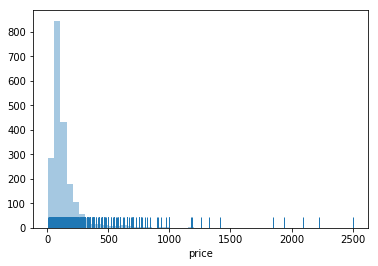

In [11]:
df1=df[df['price']<=3000]
sns.distplot(df1['price'], kde=False, rug=True)

## When we have removed the three too high price, the distribution is skewed distribution(positive skew)

c.The room type is one of the most important characteristics of the rental, and has a significant impact on the average nightly price. Analyze the relationship between the room type and average nightly price, and describe your results.


In [12]:
df1['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

(0, 600)

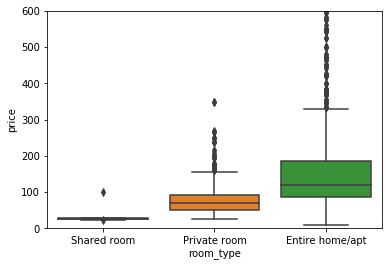

In [13]:
room_type=sns.boxplot(x=df1['room_type'], y=df1['price'], data=df, order=['Shared room','Private room','Entire home/apt'],
            orient='v')
room_type.set_ylim([0,600])


In [14]:
df.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,1480.0,188.132432,476.547165,10.0,87.0,120.0,190.00,10000.0
Private room,565.0,90.281416,118.049006,25.0,50.0,70.0,92.00,1850.0
Shared room,8.0,35.375000,26.218519,22.0,25.5,27.0,27.75,100.0


## Then we can see both from the boxplot and from the groupby result that the average night price for shared room is the lowest(35.38),and increases for private room(90.28), the entire home/apt is the highest(188.13). Alse, we can see that the range of price for each room type goes up. The variance for the price of Entire home/apt is relatively big, which means that the price of entire home range from very low to very high. But the minimum price is another story. The Entire home/Apt has the lowest minimum price with high variance in price.  

d.Aside from the size of the rental, the location is probably the other critical determinant of price. Analyze the distribution of rentals by location and the relationship between the location of the rental and average nightly price, and describe your results.


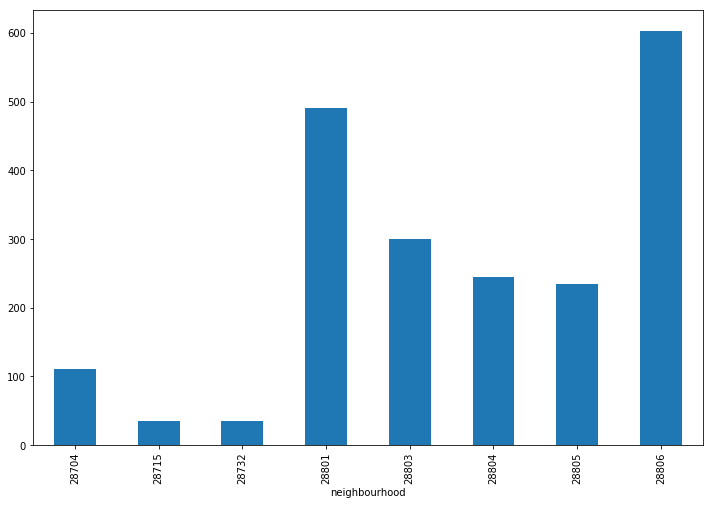

In [15]:
df.groupby(by=['neighbourhood'])['neighbourhood'].count().plot(kind='bar', figsize=(12,8))

## We can see that there are relatively more rentals in the areas with zip code of 28806 and 28801, little rentals in areas with zip code of 28715 and 28732.

(0, 600)

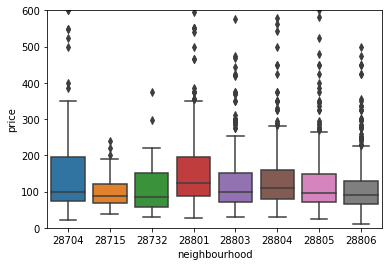

In [16]:
ax=sns.boxplot(x=df1['neighbourhood'], 
            y=df1['price'], data=df,orient='v')
ax.set_ylim([0,600])

In [17]:
df.groupby(by=['neighbourhood'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
28704,111.0,181.603604,261.797885,22.0,75.0,99.0,195.00,2091.0
28715,35.0,102.257143,50.059578,39.0,69.0,89.0,119.50,240.0
28732,35.0,150.628571,201.514718,29.0,57.5,85.0,152.00,1000.0
28801,491.0,202.411405,497.114184,28.0,89.0,125.0,195.00,10000.0
28803,300.0,186.743333,599.410109,30.0,71.5,99.0,150.00,10000.0
28804,244.0,192.938525,643.414951,30.0,80.0,110.0,161.25,10000.0
28805,234.0,130.119658,99.703566,24.0,70.0,95.0,149.00,600.0
28806,603.0,112.416252,83.896200,10.0,65.0,90.0,129.00,995.0


## We can see that the area with zip code 28801 has the highest mean price and also high variance, the area with zip code 28715 hase the lowest mean price and also low variance. Overall, the main range of price is quite similar for different area but some has high variance and the other has low variance in price.

e.Analyze and describe the distribution of the minimum number of nights for each stay. Then, segment your analysis according to room type. Does this segmentation provide any additional clarity on the requirements specified by hosts on the minimum number of nights for each stay? Please base your explanation on your results.

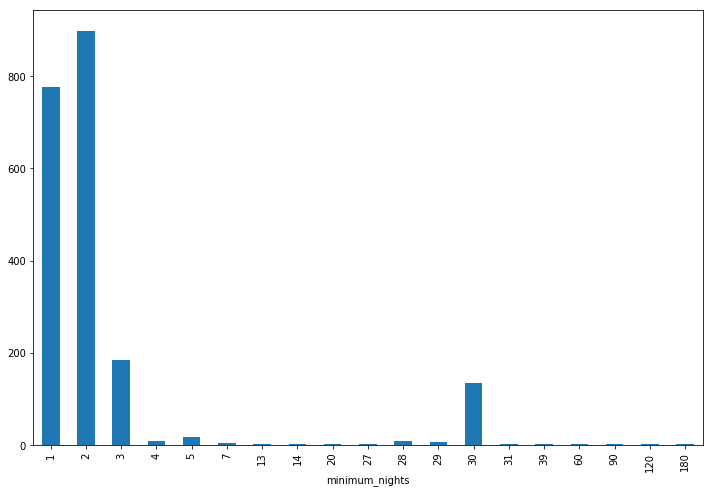

In [18]:
df.groupby(by=['minimum_nights'])['minimum_nights'].count().plot(kind='bar', figsize=(12,8))

## We can see that the minimum number of nights for each stay of most of rentals is 1 day or 2 days. There is another peak appearing on days=30, which is a month. This make sense since hosts of some rentals wants to monthly rent their house.

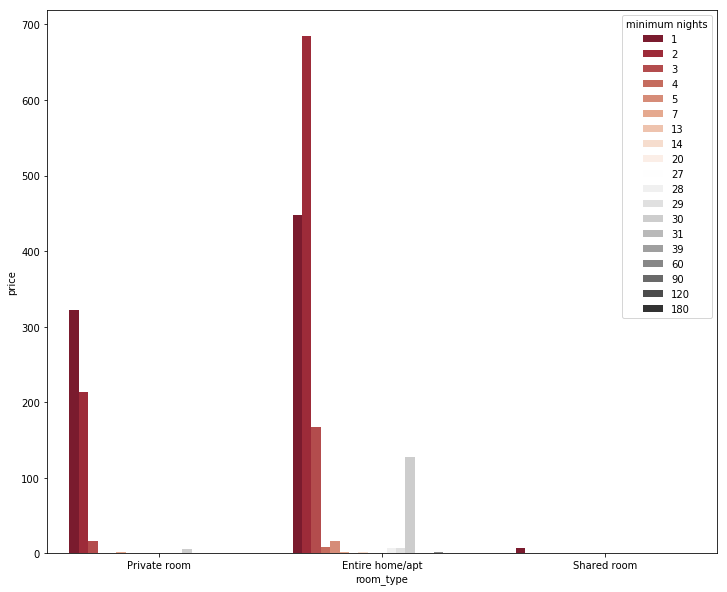

In [19]:
import numpy as np
plt.figure(figsize=(12, 10))
sns.barplot(x='room_type', y='price', hue='minimum_nights', data=df,
            palette='RdGy', ci=None, estimator=len).legend(frameon=True, title='minimum nights',loc='upper right')


## We can see that for Private room, the host are willing to rent their house even the guest only rent for one day. But for Entire home/apt, the most 'minimum number of nights for each stay' is 2 days maybe because the high cost of cleaning or somenthing else, and there are also more than 100 hosts wants their house/apt to be rent monthly for Entire home/apt which didn't happens to private room and shared room.

f.Perform an analysis of listing strategies, focusing on the hosts with at least 5 listings in the data set. Specifically, select 3 such hosts and analyze the listings for each of these hosts (separately). Describe in detail what you believe their strategy to be in terms of the types of properties that they acquire and make available for Airbnb travelers.



In [20]:
df.groupby('calculated_host_listings_count')['calculated_host_listings_count'].count()

calculated_host_listings_count
1     1212
2      370
3      159
4       68
5       30
7       35
8       16
9       18
10      20
11      11
12      24
13      13
16      16
17      17
22      44
Name: calculated_host_listings_count, dtype: int64

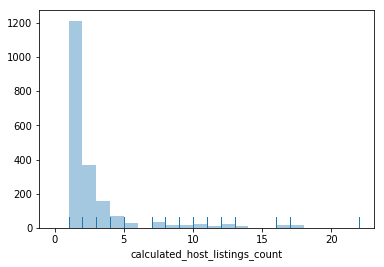

In [21]:
sns.distplot(df['calculated_host_listings_count'],
             kde=False, rug=True,bins=np.arange(df['calculated_host_listings_count'].max()))

## We can see the distribution of listings, most hosts only have one listing. Some host have even more than 20 listings. 

## I will choose the host with most listings, the host with least listings and the middle host of these two to analyze.

In [22]:
listings_5=df[df['calculated_host_listings_count']>=5]
#get the host id for the top 1 host that has the most listings, 
#the last one host with least listings and the middle of them
listings_5.sort_values('calculated_host_listings_count',inplace=False,ascending=False)['host_id'].unique()

array([ 96187307, 149601167, 167186184, 134903005, 151397468,   9216883,
          427027,  46001530,  96305927, 176228522,  53185861,   1994122,
       121681645, 175871539, 151279507,    722034,   7625694,    746673,
        33151095,   8255241,  21702976,   6074062, 161559240,  36222316,
         9106631])

In [23]:
#The host with most listings.
listings_5[listings_5['host_id']==96187307]['room_type'].unique()

array(['Entire home/apt'], dtype=object)

In [24]:
listings_5[listings_5['host_id']==96187307]['price'].describe()

count       22.000000
mean      1783.863636
std       3345.224717
min        275.000000
25%        381.250000
50%        450.000000
75%        687.500000
max      10000.000000
Name: price, dtype: float64

Text(0.5, 0, 'rental id')

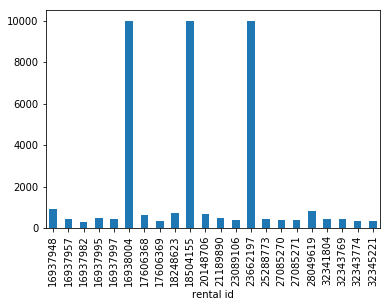

In [25]:
listings_5[listings_5['host_id']==96187307]['price'].plot(kind='bar')
plt.xlabel('rental id')

## We can see that this host have 22 listings, they are all renting by 'Entire house/apt' and most of these houses are with a price of less than 1000, but he also have three rentals whose price are quite high. The prices vary from 275 to 10000.  The price of his rentals are relativily high.

In [26]:
a=listings_5[listings_5['host_id']==96187307]
a[listings_5['price']==10000]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
16938004,Summit Cottage,96187307,Steve,28803,35.56154,-82.54096,Entire home/apt,10000,1,4,2018-01-01,0.2,22,0
18504155,Brookwood,96187307,Steve,28804,35.65159,-82.55447,Entire home/apt,10000,1,0,None,0.0,22,0
23662197,Montgord Bungalow,96187307,Steve,28801,35.59847,-82.56699,Entire home/apt,10000,1,0,None,0.0,22,0


## We can see that these three rentals may be luxury house, but none of them are available next year. We need to know more about that.

In [27]:
listings_5[listings_5['host_id']==9106631]['room_type'].unique()

array(['Private room'], dtype=object)

In [28]:
listings_5[listings_5['host_id']==9106631]['price'].describe()

count      5.000000
mean     151.000000
std       19.493589
min      125.000000
25%      135.000000
50%      165.000000
75%      165.000000
max      165.000000
Name: price, dtype: float64

Text(0.5, 0, 'rental id')

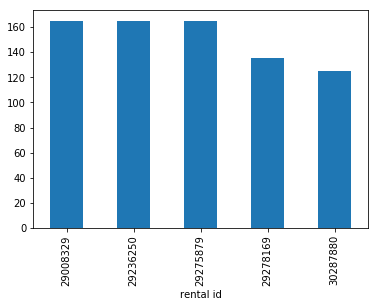

In [29]:
listings_5[listings_5['host_id']==9106631]['price'].plot(kind='bar')
plt.xlabel('rental id')

## We can see that the room type for this host(with only 5 listings) are all private room. And the price of these rentals are very close and all less than 200 dollars. They are relativily cheap.

In [30]:
listings_5[listings_5['host_id']==121681645]['room_type'].unique()

array(['Entire home/apt'], dtype=object)

In [31]:
listings_5[listings_5['host_id']==121681645]['price'].describe()

count      8.000000
mean     307.375000
std      191.969445
min       40.000000
25%      215.000000
50%      292.000000
75%      356.250000
max      700.000000
Name: price, dtype: float64

Text(0.5, 0, 'rental id')

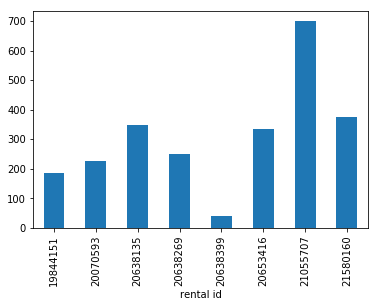

In [32]:
listings_5[listings_5['host_id']==121681645]['price'].plot(kind='bar')
plt.xlabel('rental id')

## For this host(with 8 listings), the room type of all rentals are 'Entire house/apt', but the price vary from 40 to 700 dollars with a mean price of 300 dollars. High variance mean maybe different kind of rentals, targeted to different customers, from cheap to exepensive.